### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
%matplotlib inline


### Load train dataset

In [3]:
AbsenteeismAtWork = pd.read_csv('data/train_data.csv', index_col=0)
AbsenteeismAtWork['Work load Average/day '] = [x.replace(',', '') for x in AbsenteeismAtWork['Work load Average/day ']]
AbsenteeismAtWork['Work load Average/day '] = AbsenteeismAtWork['Work load Average/day '].astype(int)

X_train = AbsenteeismAtWork.drop('Absent', 1)
y_train =  AbsenteeismAtWork['Absent']
X_test = pd.read_csv('data/test_data.csv', index_col=0)
y_test = pd.read_csv('data/sample_submission.csv', index_col=0)

### Peak data set

In [3]:
AbsenteeismAtWork.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
ID,,,,,,,,,,,,,,,,,,,,
1,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,1
2,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,1
4,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,1
5,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,1


### Get summary of DataFrame


In [4]:
AbsenteeismAtWork.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 20 columns):
Reason for absence                 500 non-null int64
Month of absence                   500 non-null int64
Day of the week                    500 non-null int64
Seasons                            500 non-null int64
Transportation expense             500 non-null int64
Distance from Residence to Work    500 non-null int64
Service time                       500 non-null int64
Age                                500 non-null int64
Work load Average/day              500 non-null int64
Hit target                         500 non-null int64
Disciplinary failure               500 non-null int64
Education                          500 non-null int64
Son                                500 non-null int64
Social drinker                     500 non-null int64
Social smoker                      500 non-null int64
Pet                                500 non-null int64
Weight                         

### Get descriptive statistics
!!! A new DataFrame should be created, without binary columns !!! 

In [5]:
AbsenteeismAtWork.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,19.288000,6.614000,3.88000,2.450000,223.640000,29.978000,12.650000,36.660000,276792.768000,94.168000,0.064000,1.204000,1.086000,0.620000,0.076000,0.628000,79.698000,172.098000,26.870000,0.790000
std,8.543245,3.343555,1.43587,1.165425,67.323155,15.068498,4.036345,6.137731,43422.722869,3.912338,0.244998,0.561261,1.178721,0.485873,0.265264,1.071406,12.605101,6.234913,4.151092,0.407716
min,0.000000,1.000000,2.00000,1.000000,118.000000,5.000000,3.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.750000,3.00000,1.000000,179.000000,16.000000,10.000000,33.000000,244387.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,1.000000
50%,23.000000,7.000000,4.00000,2.000000,225.000000,26.000000,13.000000,37.000000,265017.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,1.000000
75%,26.000000,9.000000,5.00000,4.000000,260.000000,50.000000,16.000000,40.000000,306345.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,1.000000
max,28.000000,12.000000,6.00000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,3.000000,4.000000,1.000000,1.000000,5.000000,108.000000,196.000000,38.000000,1.000000


### Check missing values

In [6]:
print(AbsenteeismAtWork.isnull().sum(axis=0))      

Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absent                             0
dtype: int64


# EDA

Let's create some simple plots to check out the data!

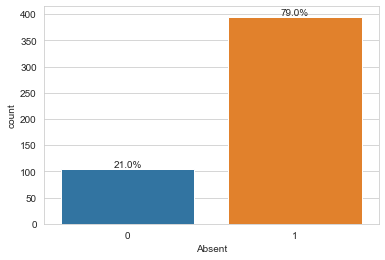

In [7]:
sns.set_style('whitegrid')
ax = sns.countplot(x='Absent',data=AbsenteeismAtWork)


total = len(AbsenteeismAtWork['Absent'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/total),
            ha="center") 

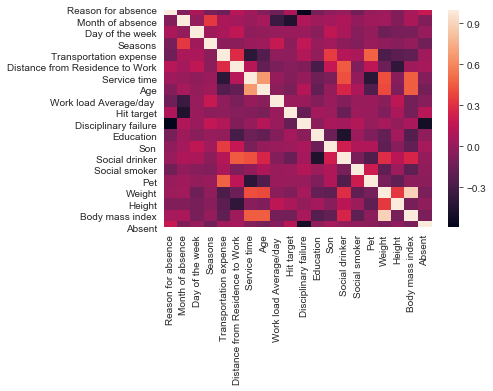

In [8]:
sns.heatmap(AbsenteeismAtWork.corr())

Text(0.5, 1.0, 'Abstenção por dia de semana')

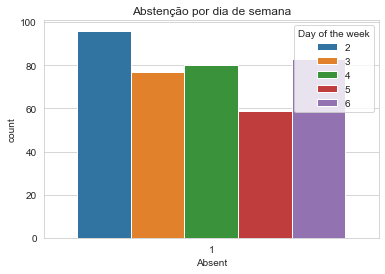

In [4]:
sns.set_style('whitegrid')
ax = sns.countplot(x='Absent',hue='Day of the week',data=AbsenteeismAtWork.loc[AbsenteeismAtWork['Absent'] == 1])
ax.set_title('Abstenção por dia de semana')

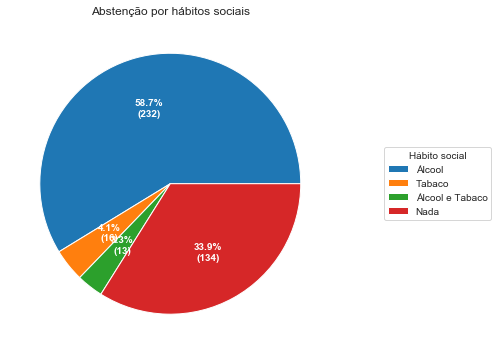

In [5]:
data = AbsenteeismAtWork
contagem_drink = data[(data['Social drinker'] == True) & (data['Social smoker']==False)]['Absent'].sum()
contagem_smoke = data[(data['Social drinker'] == False) & (data['Social smoker']==True )]['Absent'].sum()
contagem_both = data[(data['Social drinker'] == True) & (data['Social smoker']==True)]['Absent'].sum()
contagem_saudavel = data[(data['Social drinker'] == False) & (data['Social smoker']==False)]['Absent'].sum()
absen = [contagem_drink, contagem_smoke, contagem_both, contagem_saudavel]
pie_labels = ['Álcool', 'Tabaco', 'Álcool e Tabaco', 'Nada']
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(absen, autopct=lambda pct: func(pct, absen), textprops=dict(color='w'))
ax.legend(wedges, pie_labels, title='Hábito social', loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title('Abstenção por hábitos sociais')
#plt.pie(absen, labels=pie_labels)
plt.show()

Text(0.5, 1.0, 'Abstenção por número de filhos')

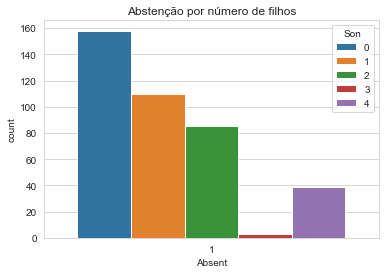

In [6]:
sns.set_style('whitegrid')
ax = sns.countplot(x='Absent',hue='Son',data=AbsenteeismAtWork.loc[AbsenteeismAtWork['Absent'] == 1])
ax.set_title('Abstenção por número de filhos')

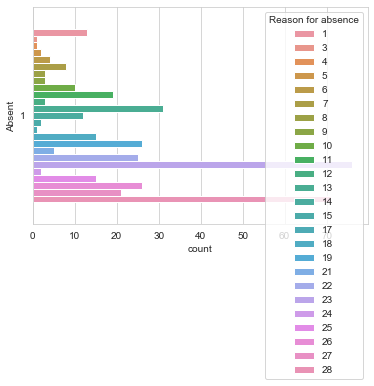

In [8]:
sns.countplot(y='Absent',hue='Reason for absence',data=AbsenteeismAtWork.loc[AbsenteeismAtWork['Absent'] == 1])

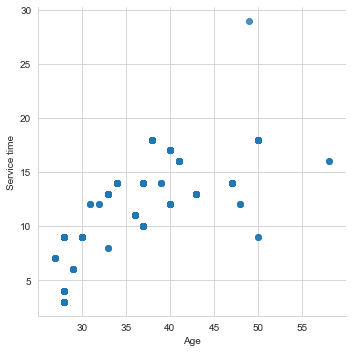

In [9]:
sns.lmplot('Age','Service time',data=AbsenteeismAtWork.loc[AbsenteeismAtWork['Absent'] == 1],fit_reg=False)

#### Data Cleaning

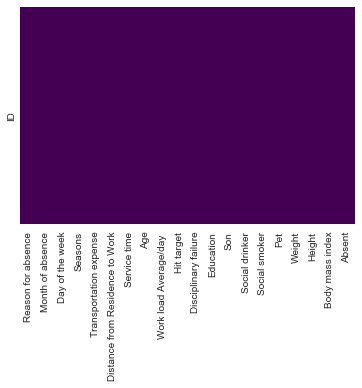

In [13]:
sns.heatmap(AbsenteeismAtWork.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Creating and Training the Models

In [14]:
log = LogisticRegression()
log.fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
rbfSVC = SVC()
rbfSVC.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Models Prediction and Evaluation



In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluateTechnique(X_train, y_train, transformer):
    
    X_train = transformer(X_train)
    
    classifiers = [
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=5),
        SVC(),
        SVC(kernel='linear'),
        GaussianProcessClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        MLPClassifier(max_iter=1000),
        AdaBoostClassifier(),
        SGDClassifier(),
        GaussianNB()
    ]

    names = ["ElasticNet", "Logistic regression", "KNearest Neighbors (5)", "SVM-rbf", "SMV-linear","Gaussian Process", "Decision Tree", "Random Forest", "Multi-layer Perceptron classifier",
                 "AdaBoost", "SGDClassifier", "QDA"]


    for name, clf in zip(names, classifiers):
        scores = cross_val_score(clf, X_train, y_train, cv=5)
        print(name, "Accuracy: %0.6f (+/- %0.6f)" % (scores.mean(), scores.std() * 2))
        
    return 

def evaluateModel(name, y_test, predicted):
    print("".join(["Precision 0: ",'%.3f' % precision_score(y_test,predicted,pos_label=0),
                   "; Precision 1: ",'%.3f' % precision_score(y_test,predicted,pos_label=1),
                   "; Recall 0: ",'%.3f' % recall_score(y_test,predicted,pos_label=0),
                   "; Recall 1: ",'%.3f' % recall_score(y_test,predicted,pos_label=1),
                  "; Accuracy: ",'%.3f' % accuracy_score(y_test,predicted), "; -> " , name]))
    return;



In [16]:
predLog = log.predict(X_test)
predKNN = knn.predict(X_test)
predRbfSVC = rbfSVC.predict(X_test)

In [17]:
evaluateModel("Log reg",y_test,predLog)
evaluateModel("KNN w/ KBest",y_test,predKNN)
evaluateModel("RBF SVC w/ KBest",y_test,predRbfSVC)


Precision 0: 0.000; Precision 1: 0.816; Recall 0: 0.000; Recall 1: 0.995; Accuracy: 0.812; -> Log reg
Precision 0: 0.154; Precision 1: 0.813; Recall 0: 0.091; Recall 1: 0.888; Accuracy: 0.742; -> KNN w/ KBest
Precision 0: 0.000; Precision 1: 0.817; Recall 0: 0.000; Recall 1: 1.000; Accuracy: 0.817; -> RBF SVC w/ KBest


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print(predLog)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [19]:
print(predRbfSVC)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
print(predKNN)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1]


In [21]:
print(predRbfSVC)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
